## Time Series components

- Trends
    1. Upward
    2. Horizontal/Stationary
    3. Downward

- Seasonality -> Repeating trend
    

- Cyclical - > Trends with no set repetition
     

In [14]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('Data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959        1  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959        2  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959        3  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959        4  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960        1  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19

In [15]:
df.tail()

year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
2008-09-30  2008        3  13324.600    9267.7  1990.693   991.551   9838.3   
2008-12-31  2008        4  13141.920    9195.3  1857.661  1007.273   9920.4   
2009-03-31  2009        1  12925.410    9209.2  1558.494   996.287   9926.4   
2009-06-30  2009        2  12901.504    9189.0  1456.678  1023.528  10077.5   
2009-09-30  2009        3  12990.341    9256.0  1486.398  1044.088  10040.6   

                cpi      m1  tbilrate  unemp      pop  infl  realint  
2008-09-30  216.889  1474.7      1.17    6.0  305.270 -3.16     4.33  
2008-12-31  212.174  1576.5      0.12    6.9  305.952 -8.79     8.91  
2009-03-31  212.671  1592.8      0.22    8.1  306.547  0.94    -0.71  
2009-06-30  214.469  1653.6      0.18    9.2  307.226  3.37    -3.19  
2009-09-30  216.385  1673.9      0.12    9.6  308.013  3.56    -3.44

In [16]:
df.shape

(203, 14)

<AxesSubplot:>

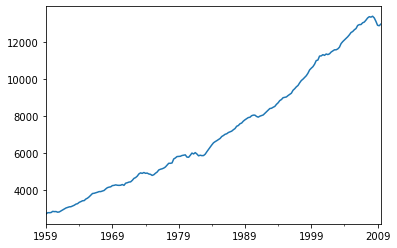

In [17]:
df['realgdp'].plot()

In [18]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [19]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [20]:
type(gdp_cycle)

pandas.core.series.Series

In [21]:
type(gdp_trend)

pandas.core.series.Series

<AxesSubplot:>

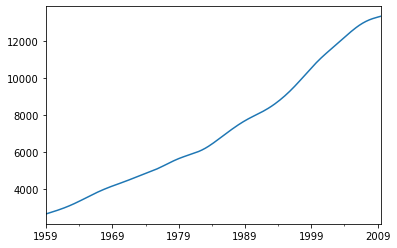

In [22]:
gdp_trend.plot()

In [23]:
df['trend'] = gdp_trend

In [24]:
df.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959        1  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959        2  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959        3  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959        4  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960        1  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint        trend  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  2670.837085  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  2698.712468  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  2726.612545  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  2754.612067  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19  2782.816333

<AxesSubplot:>

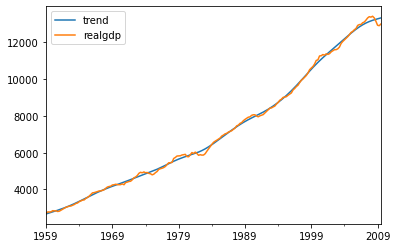

In [25]:
df[['trend', 'realgdp']].plot()

<AxesSubplot:>

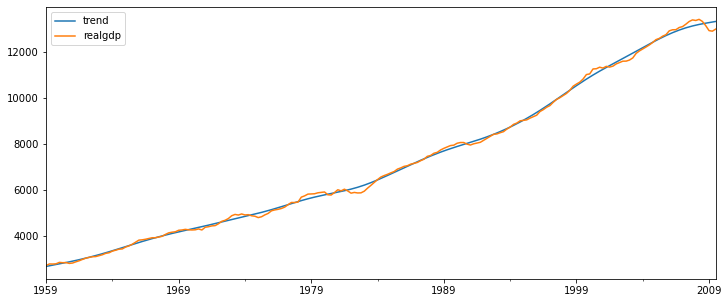

In [26]:
df[['trend', 'realgdp']].plot(figsize=(12,5))

<AxesSubplot:>

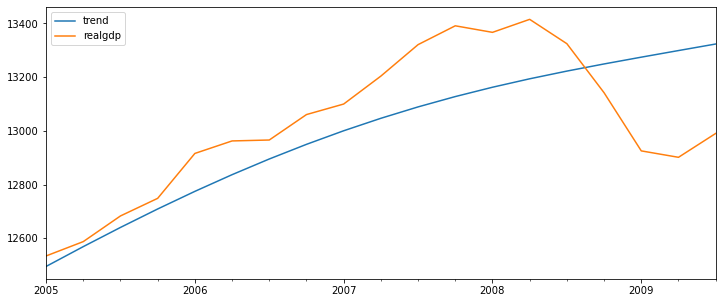

In [27]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12,5))

### ETS Model

- ETS (Error-Trend-Seasonality) models will take each of those terms for "smoothing" and may add them, multiply them, or even just leave some of them out.
- Based off these key factors, we can try to create a model to fit our data.
- Time Series Decomposition with ETS (Error-Trend-Seasonality)
- Visualizing the data based off its ETS is a good way to build understanding of its behaviour.

- We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers)

- A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers)

In [28]:
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [29]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [30]:
airline.isnull().sum()

Thousands of Passengers    0
dtype: int64

<AxesSubplot:xlabel='Month'>

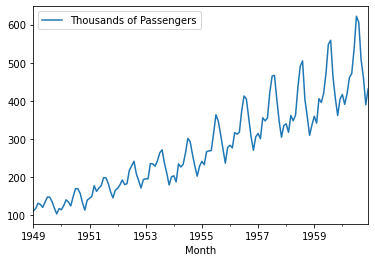

In [31]:
airline.plot()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

In [34]:
result

In [35]:
result.trend.head(25)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
1950-09-01    145.708333
1950-10-01    148.416667
1950-11-01    151.541667
1950-12-01    154.708333
1951-01-01    157.125000
Name: trend, dtype: float64

In [36]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [37]:
result.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

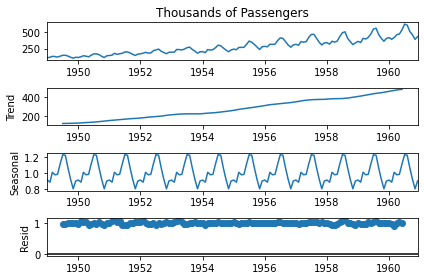

In [38]:
result.plot();

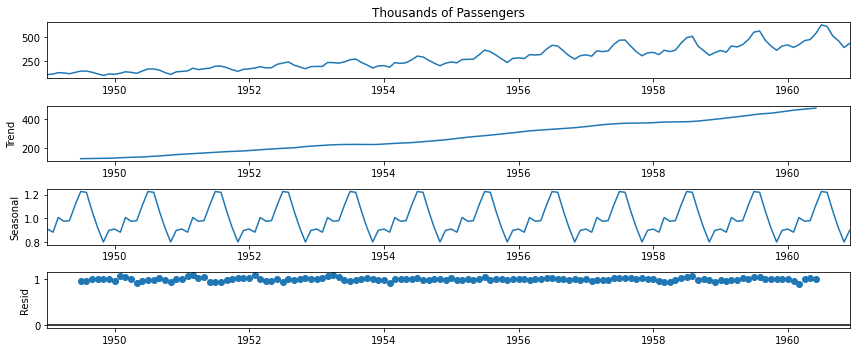

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

### EWMA

### SMA
- We could theoretically attempt to use these simple moving averages to build a generalized model for the real world time series we're analyzing
- An issue with SMA is that the entire model will be constrained to the same window size.
- It would be nice if we could have more recent data be weighted more than older data.
- We do this by implementing a EWMA instead of SMA.

### Basic SMA has some "weaknesses".
- smaller windows will lead to more noise, rather than signal.
- It will always lag by the size of the window.
- It will never reach to pull peak or valley of the data due to the averaging.
- Does not really inform you about possible future behaviour, all it really does is describe trends in current data.
- Extreme historical values can skew your SMA significantally.


### To fix above issues we use Extended weighted moving average
- EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name) 
- The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.

In [40]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [41]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [42]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [43]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

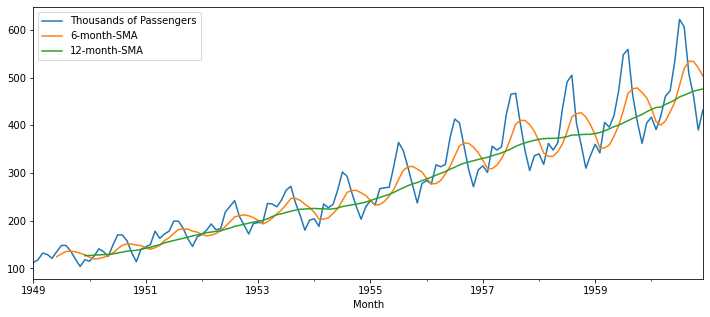

In [44]:
airline.plot()

<AxesSubplot:xlabel='Month'>

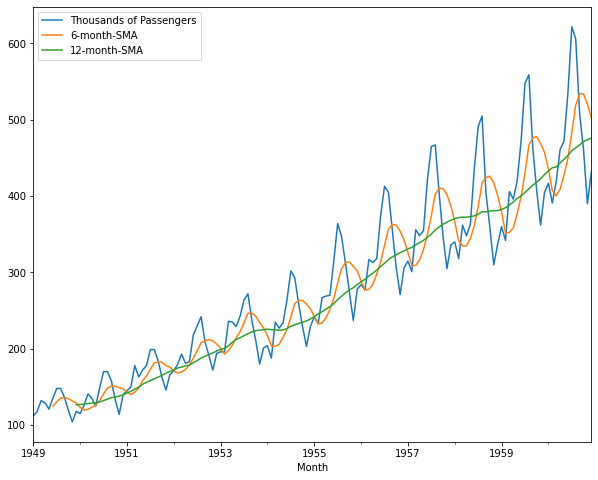

In [45]:
airline.plot(figsize=(10,8))

In [46]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

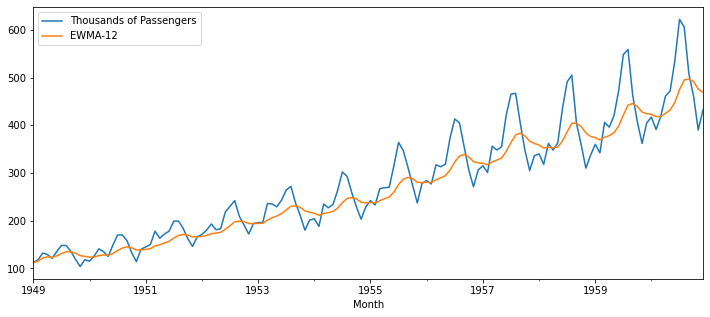

In [47]:
airline[['Thousands of Passengers', 'EWMA-12']].plot()

### Holt winters method

- Exponentially weighted moving averages (EWMA) we applied simple exponential smoothing using just one smoothing factor alpha.
- This failed to account for other contributing factors likr trend and seasonality.
- here, we are fitting the Holt - Winters model to an underlying time series data set.
- Holt (1957) and Winters (1960) extended Holt's method to capture seasonality.
- The Holt- Winters seasonal method comprises of the forecast equation and three smoothingequations.
- One for the level l_t, one for the trend b_t, and one for the seasonal component s_t, with corresponding smoothing parameters $\alpha$, $\beta$ and $\gamma$
- There are two variations to this method that differ in the nature of the seasonal component.

- The additive method is preffered when the seasonal variations are roughly constant through the series, while the multiplicative method is preffered when the seasonal variations are changing proportional to the level of the series.

- Let's explore the Holt - Winters methods, which allows us to add on double and tripple exponential smoothing.

### Single Exponential Smoothing

- Level

\begin{split}y_0 &= x_0, \\
l_t &= (1 - \alpha) l_{t-1} + \alpha x_t  \\
\end{split}

- In double exponential smoothing (aka Holt's Method) We introduce a new smoothing factor $\beta$ (Beta) that addresses trend:

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}


With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

### Holt's - Winters Methods Code Along

In [48]:
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [49]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [50]:
airline.index.freq = 'MS'

In [51]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [52]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [53]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [54]:
span = 12
alpha=2/(span+1)

In [55]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [56]:
airline.head()

Thousands of Passengers      EWMA12
Month                                          
1949-01-01                      112  112.000000
1949-02-01                      118  112.923077
1949-03-01                      132  115.857988
1949-04-01                      129  117.879836
1949-05-01                      121  118.359861

In [57]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [58]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [59]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [60]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [61]:
airline['SES12'] = fitted_model.fittedvalues.shift(-1)

In [62]:
airline.head()

Thousands of Passengers      EWMA12       SES12
Month                                                      
1949-01-01                      112  112.000000  112.000000
1949-02-01                      118  112.923077  112.923077
1949-03-01                      132  115.857988  115.857988
1949-04-01                      129  117.879836  117.879836
1949-05-01                      121  118.359861  118.359861

<AxesSubplot:xlabel='Month'>

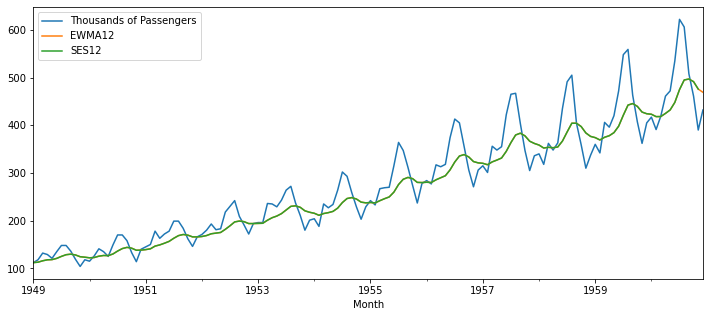

In [63]:
airline.plot()

In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [65]:
airline['DES_add_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [66]:
airline.head()

Thousands of Passengers      EWMA12       SES12  DES_add_12
Month                                                                  
1949-01-01                      112  112.000000  112.000000  114.221156
1949-02-01                      118  112.923077  112.923077  120.175837
1949-03-01                      132  115.857988  115.857988  134.115056
1949-04-01                      129  117.879836  117.879836  131.244976
1949-05-01                      121  118.359861  118.359861  123.283465

In [67]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

<AxesSubplot:xlabel='Month'>

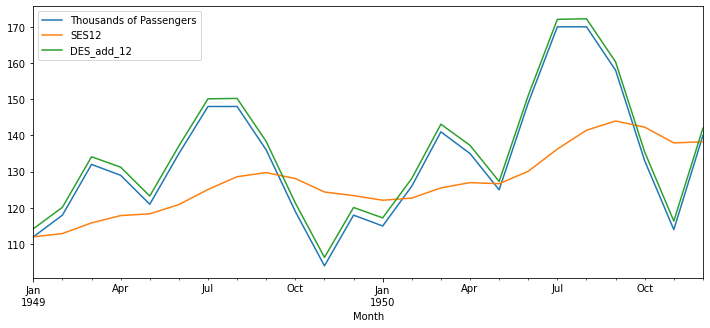

In [68]:
airline[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))

<AxesSubplot:xlabel='Month'>

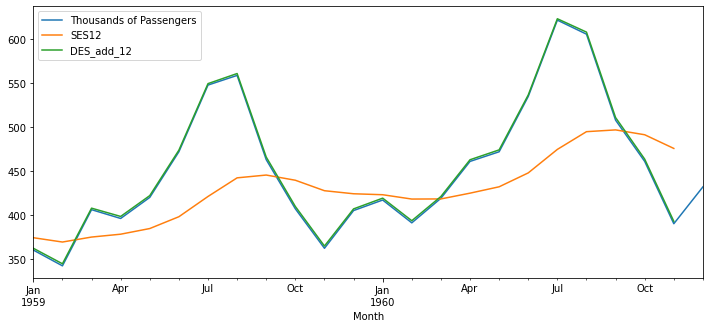

In [69]:
airline[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5))

In [70]:
airline['DES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [71]:
airline.head()

Thousands of Passengers      EWMA12       SES12  DES_add_12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.221156   
1949-02-01                      118  112.923077  112.923077  120.175837   
1949-03-01                      132  115.857988  115.857988  134.115056   
1949-04-01                      129  117.879836  117.879836  131.244976   
1949-05-01                      121  118.359861  118.359861  123.283465   

            DES_mul_12  
Month                   
1949-01-01  112.688538  
1949-02-01  118.725424  
1949-03-01  132.811491  
1949-04-01  129.793048  
1949-05-01  121.743867

<AxesSubplot:xlabel='Month'>

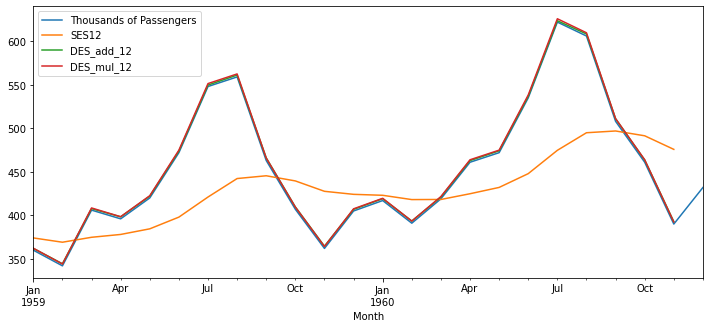

In [72]:
airline[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[-24:].plot(figsize=(12,5))

<AxesSubplot:xlabel='Month'>

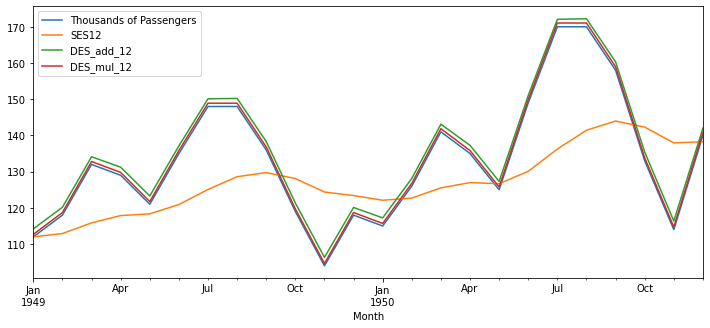

In [73]:
airline[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))

In [74]:
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [75]:
airline.head()

Thousands of Passengers      EWMA12       SES12  DES_add_12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.221156   
1949-02-01                      118  112.923077  112.923077  120.175837   
1949-03-01                      132  115.857988  115.857988  134.115056   
1949-04-01                      129  117.879836  117.879836  131.244976   
1949-05-01                      121  118.359861  118.359861  123.283465   

            DES_mul_12  TES_mul_12  
Month                               
1949-01-01  112.688538  118.841794  
1949-02-01  118.725424  133.334074  
1949-03-01  132.811491  127.898917  
1949-04-01  129.793048  120.977474  
1949-05-01  121.743867  133.904879

<AxesSubplot:xlabel='Month'>

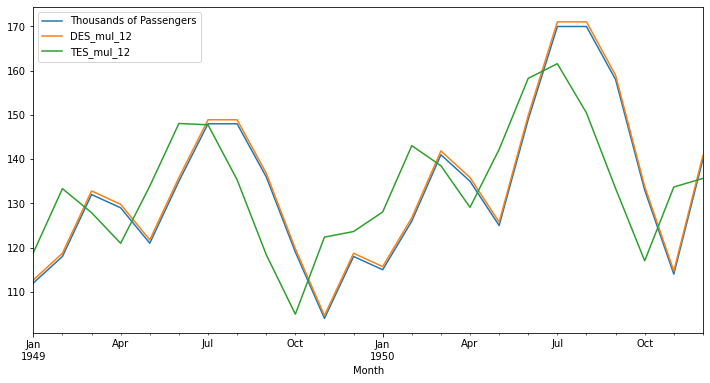

In [76]:
airline[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,6))

In [77]:
### Statsmodels Time Series Excercises

In [78]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('data/EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

EnergyIndex
DATE                   
1970-01-01      43.0869
1970-02-01      42.5577
1970-03-01      41.6215
1970-04-01      40.1982
1970-05-01      39.9321

In [79]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [80]:
df.index.freq = 'MS'

### 2. Plot the dataset.

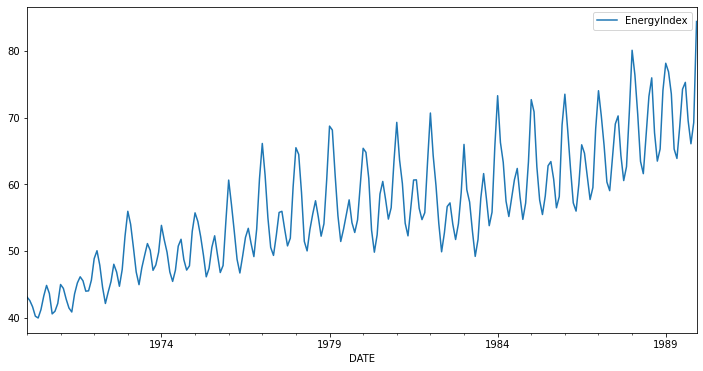

In [81]:
df.plot(figsize=(12,6)).autoscale(axis='x', tight=True)

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).
###    Plot the result.

In [82]:
df.head()

EnergyIndex
DATE                   
1970-01-01      43.0869
1970-02-01      42.5577
1970-03-01      41.6215
1970-04-01      40.1982
1970-05-01      39.9321

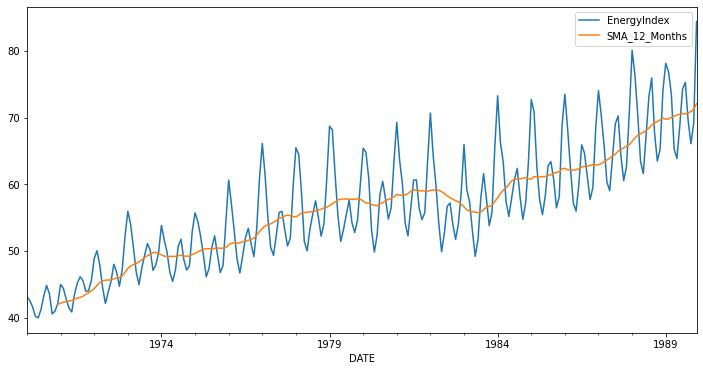

In [83]:
df['SMA_12_Months'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(12,6)).autoscale(axis='x', tight=True)

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels SimpleExpSmoothing function. Plot the result.

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


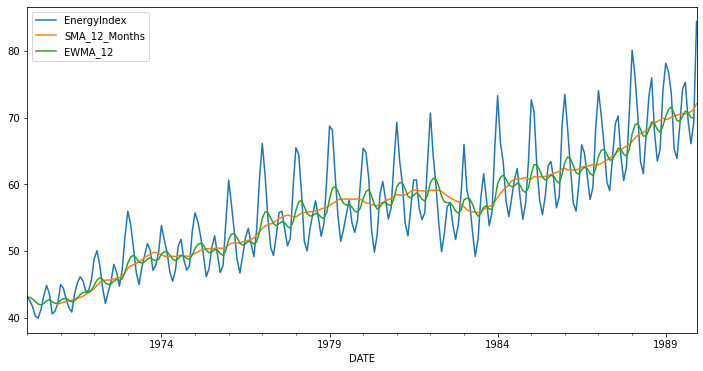

In [88]:
df['EWMA_12']=ExponentialSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
df.plot(figsize=(12,6)).autoscale(axis='x', tight=True)

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


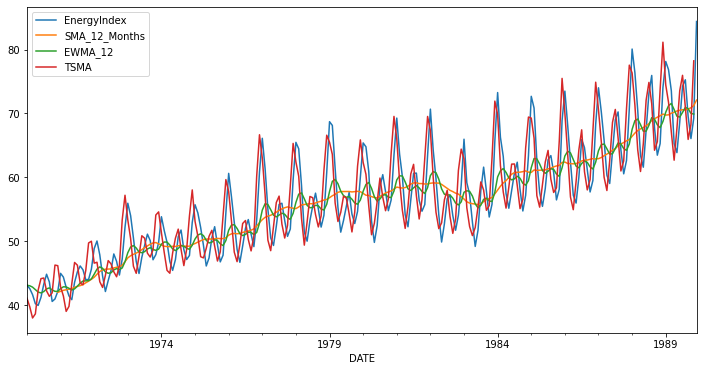

In [90]:
df['TSMA'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot(figsize=(12,6)).autoscale(axis='x', tight=True)

### Plot the same as above, but for only the first two years.


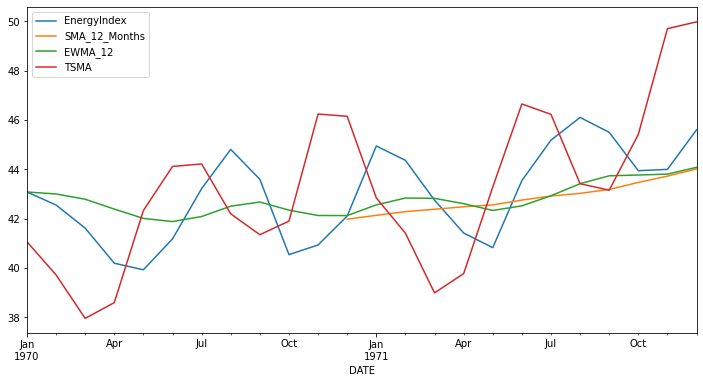

In [92]:
df.iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True)